Marketing Channel Study Using Linear Regression

Data includes TV, Radio and Newspaper spend as well as Sales

Solution involved: 
- Normalizing error distribution
- Finding the highest R-squared
- Reducing heteroscedasticity

In [1]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [2]:
data = pd.read_csv('Advertising.csv')
display(data.head())

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900


In [3]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000,200.000,200.000,200.000,200.000
mean,100.500,147.042,23.264,30.554,14.023
std,57.879,85.854,14.847,21.779,5.217
min,1.000,0.700,0.000,0.300,1.600
25%,50.750,74.375,9.975,12.750,10.375
50%,100.500,149.750,22.900,25.750,12.900
75%,150.250,218.825,36.525,45.100,17.400
max,200.000,296.400,49.600,114.000,27.000


In [4]:
data.Radio[data.Radio==0] = 1

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
Radio         200 non-null float64
Newspaper     200 non-null float64
Sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
# Fit the model

regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1,1)
X = data[['TV', 'Radio', 'Newspaper']]
regr.fit(X,Y)

# Review results
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared: \n', regr.score(X,Y))


Coefficients: 
 [[ 0.04577181  0.18866999 -0.0010302 ]]

Intercept: 
 [2.9334131]

R-squared: 
 0.8973574508992906


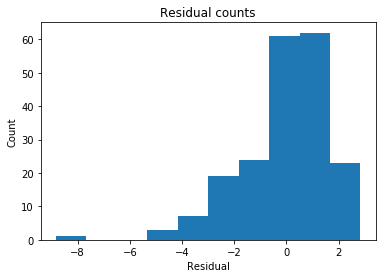

In [7]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error (or residual).
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

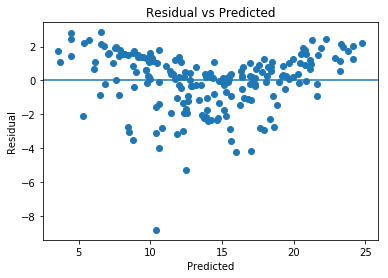

In [8]:
plt.scatter(predicted, residual)
plt.title('Residual vs Predicted')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.show()

In [9]:
correlation_matrix = X.corr()
display(correlation_matrix)

,TV,Radio,Newspaper
TV,1.000,0.055,0.057
Radio,0.055,1.000,0.354
Newspaper,0.057,0.354,1.000


In [10]:
# Fixing heteroscedasticity and multivariate non-normality

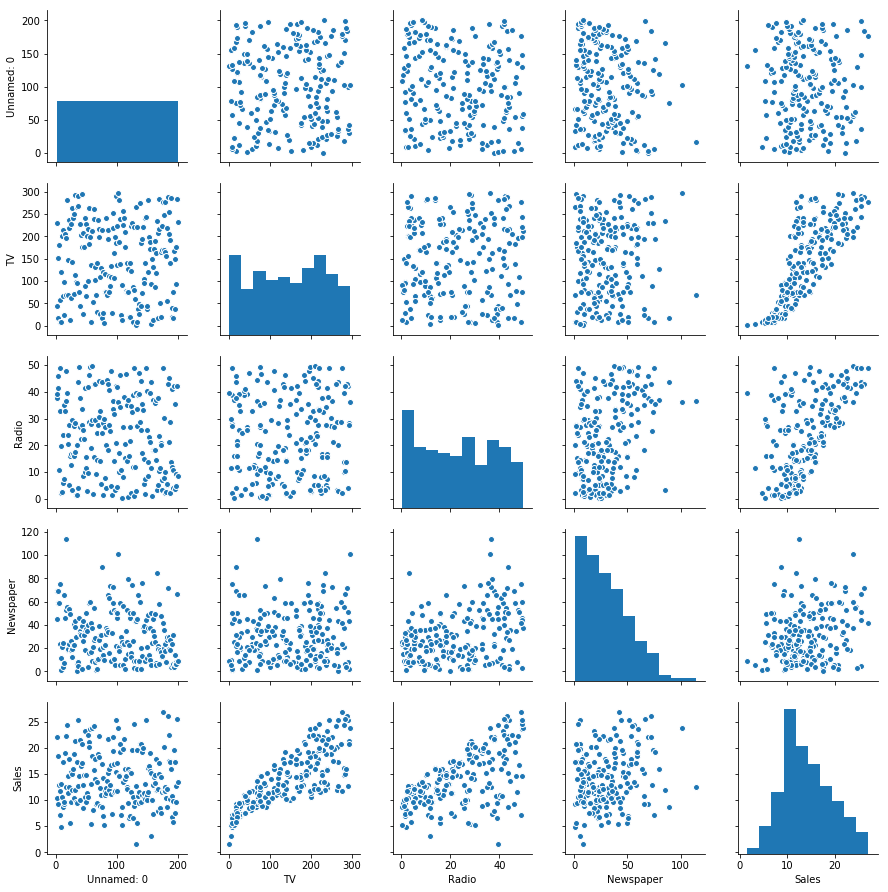

In [11]:
sns.pairplot(data)

In [12]:
data.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000,0.018,-0.111,-0.155,-0.052
TV,0.018,1.000,0.055,0.057,0.782
Radio,-0.111,0.055,1.000,0.354,0.576
Newspaper,-0.155,0.057,0.354,1.000,0.228
Sales,-0.052,0.782,0.576,0.228,1.000


In [13]:
data = data.dropna()

{'boxes': [<matplotlib.lines.Line2D at 0xf6eb970>],
 'caps': [<matplotlib.lines.Line2D at 0xf6ebf70>,
 'fliers': [<matplotlib.lines.Line2D at 0xf6f4870>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xf78d4d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0xf6ebbf0>,
  <matplotlib.lines.Line2D at 0xf6ebe70>]}

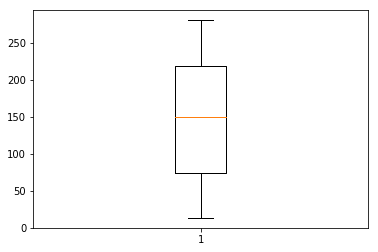

In [32]:
plt.boxplot(data['TV'])

{'boxes': [<matplotlib.lines.Line2D at 0x940090>],
 'caps': [<matplotlib.lines.Line2D at 0x940810>,
 'fliers': [<matplotlib.lines.Line2D at 0x940fb0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x940d70>],
 'whiskers': [<matplotlib.lines.Line2D at 0x940310>,
  <matplotlib.lines.Line2D at 0x940590>]}

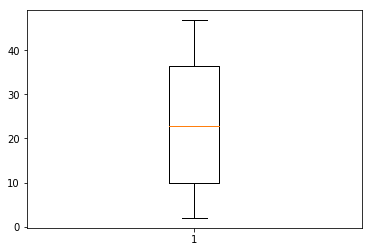

In [33]:
plt.boxplot(data['Radio'])

{'boxes': [<matplotlib.lines.Line2D at 0x97c490>],
 'caps': [<matplotlib.lines.Line2D at 0x97cc10>,
 'fliers': [<matplotlib.lines.Line2D at 0x9823d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x97cf90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x97c710>,
  <matplotlib.lines.Line2D at 0x97c990>]}

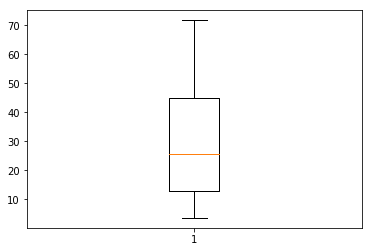

In [34]:
plt.boxplot(data['Newspaper'])

In [14]:
from scipy.stats import mstats
for col in data.columns:
    data[col] = mstats.winsorize(data[col], limits=[0.05, 0.05])

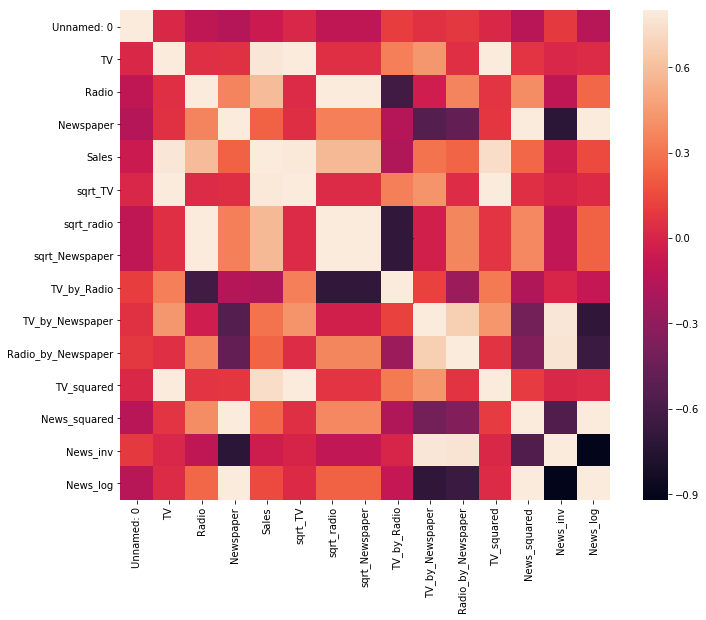

In [35]:
corrmat = data.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

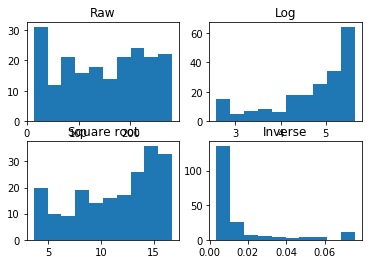

In [15]:
fig = plt.figure()

fig.add_subplot(221)
plt.hist(data['TV'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(data['TV'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(data['TV'].dropna()))
plt.title('Square root')

fig.add_subplot(224)
plt.hist(1/data['TV'].dropna())
plt.title('Inverse')
plt.show()

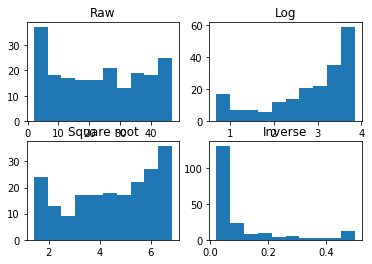

In [16]:
fig = plt.figure()

fig.add_subplot(221)
plt.hist(data['Radio'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(data['Radio'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(data['Radio'].dropna()))
plt.title('Square root')

fig.add_subplot(224)
plt.hist(1/data['Radio'].dropna())
plt.title('Inverse')
plt.show()

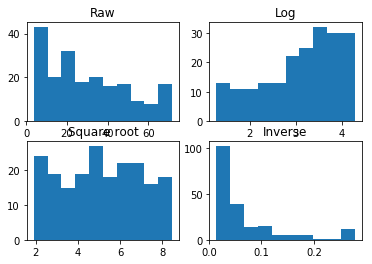

In [17]:
fig = plt.figure()

fig.add_subplot(221)
plt.hist(data['Newspaper'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(data['Newspaper'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(data['Newspaper'].dropna()))
plt.title('Square root')

fig.add_subplot(224)
plt.hist(1/data['Newspaper'].dropna())
plt.title('Inverse')
plt.show()

In [18]:
# Create a feature using a non-linear transformation.
data['sqrt_TV'] = [math.sqrt(x) for x in data['TV']]
data['sqrt_radio'] = [math.sqrt(x) for x in data['Radio']]
data['sqrt_Newspaper'] = [math.sqrt(x) for x in data['Radio']]
data['TV_by_Radio'] = data['TV'] / data['Radio']
data['TV_by_Newspaper'] = data['TV'] / data['Newspaper']
data['Radio_by_Newspaper'] = data['Radio'] / data['Newspaper']

data['TV_squared'] = data['TV'] * data['TV']
data['News_squared'] = data['Newspaper'] * data['Newspaper']
data['News_inv'] = 1/data['Newspaper']

data['News_log'] = [math.log(x) for x in data['Newspaper']]

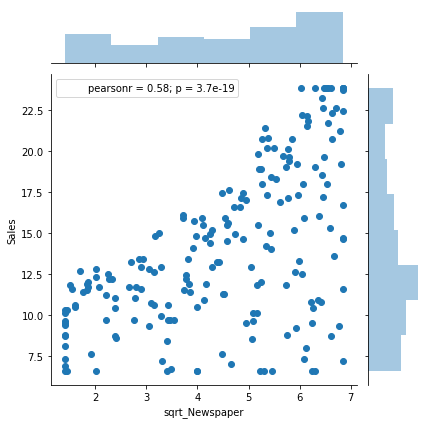

In [19]:
sns.jointplot(x = "sqrt_Newspaper", y = "Sales", data = data)

In [42]:
# Fit the model

regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1,1)
X = data[['TV','Radio','TV_by_Radio', 'News_log']]
regr.fit(X,Y)

# Review results
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared: \n', regr.score(X,Y))


Coefficients: 
 [[ 0.04779608  0.14241455 -0.04675441  0.0290695 ]]

Intercept: 
 [4.27818253]

R-squared: 
 0.9230013701651125


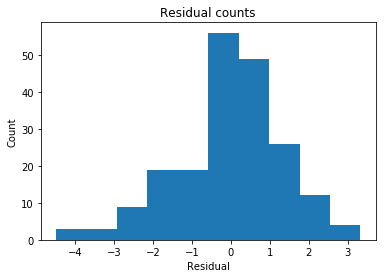

In [43]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error (or residual).
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

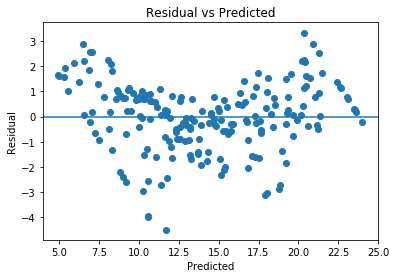

In [44]:
plt.scatter(predicted, residual)
plt.title('Residual vs Predicted')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.show()

The model with the highest R-squared (0.92) and least heteroscedasticity included 'TV','Radio','TV_by_Radio', 'News_log'.